In [47]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 1000) 
pd.set_option("display.max_rows", 1000)
df = pd.read_csv("/Users/shyamgumdala/Downloads/FY2024_068_Contracts_Full_20240214_1.csv",low_memory=False)
#df.select_dtypes(include=np.number)
#df.select_dtypes(include=np.number).columns.tolist()

print('n')



n


In [23]:
top_naics_codes = df.groupby('naics_code')['current_total_value_of_award'].nlargest(5)
result_df = pd.merge(top_naics_codes, df[['naics_code', 'naics_description']], on='naics_code', how='left')
result_df = result_df.drop_duplicates(subset='naics_code').sort_values(by=['current_total_value_of_award'], ascending= False)
result_df = result_df.head(10)
print(result_df)


       naics_code  current_total_value_of_award  \
13735    562910.0                  2.941856e+08   
2021     541330.0                  1.297494e+08   
1575     517110.0                  8.862189e+07   
4189     541611.0                  7.575748e+07   
3234     541512.0                  6.584077e+07   
10       221122.0                  5.990359e+07   
5148     541620.0                  4.952180e+07   
2949     541511.0                  3.261410e+07   
11943    541990.0                  2.591873e+07   
13441    561612.0                  2.481375e+07   
3694     541519.0                  2.312455e+07   
10778    541715.0                  2.015339e+07   
2430     541380.0                  1.996159e+07   
3669     541513.0                  1.958288e+07   
12958    561210.0                  1.207795e+07   
21       236220.0                  1.161938e+07   
1676     518210.0                  1.080567e+07   
1766     519120.0                  1.074500e+07   
13506    561621.0              

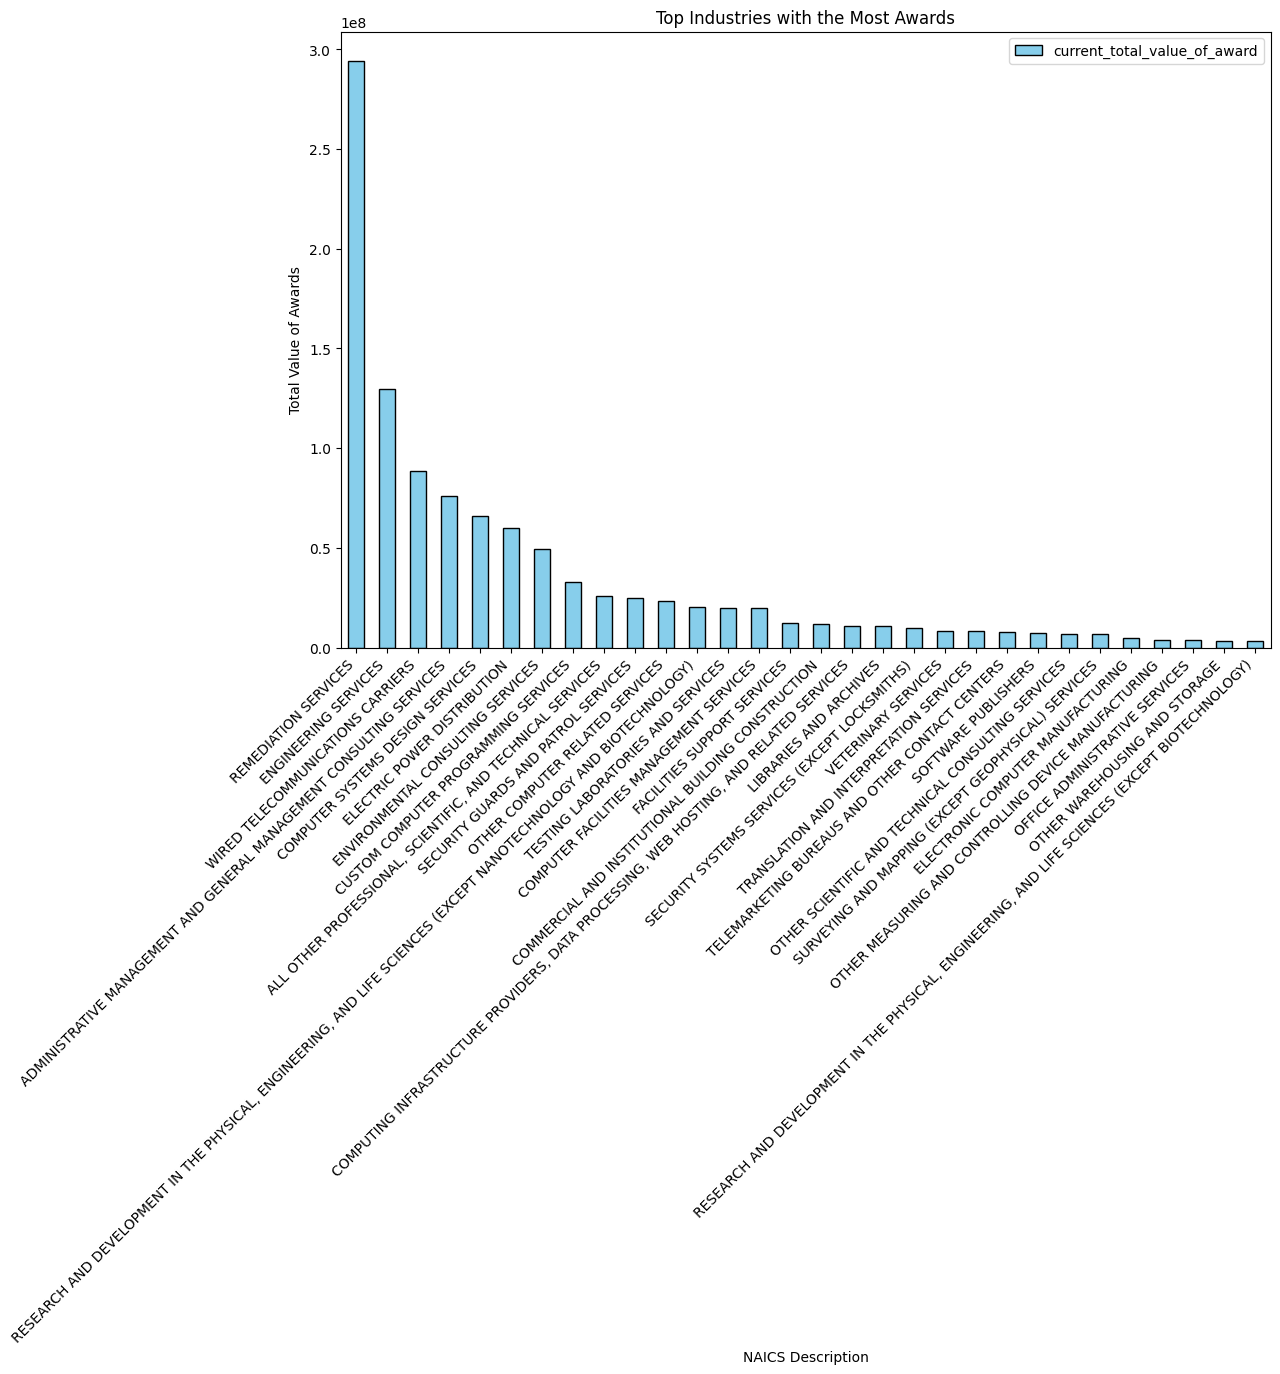

In [28]:
import matplotlib.pyplot as plt

# Assuming 'result_df' contains the result obtained from the previous step
# If not, replace it with the appropriate DataFrame containing 'naics_code', 'current_total_value_of_award', and 'naics_description'

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Create a bar plot
result_df.plot(kind='bar', x='naics_description', y='current_total_value_of_award', ax=ax, color='skyblue', edgecolor='black')


# Set labels and title
ax.set_xlabel('NAICS Description')
ax.set_ylabel('Total Value of Awards')
ax.set_title('Top Industries with the Most Awards')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

In [46]:
#Task: Find what industries woman owned buisness are in
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 1000) 
pd.set_option("display.max_rows", 1000)
df = pd.read_csv("/Users/shyamgumdala/Downloads/FY2024_068_Contracts_Full_20240214_1.csv",low_memory=False)

#1 What buisnesses are woman owned


# Count occurrences of each value in 'minority_owned_business'
minority_counts = df['minority_owned_business'].value_counts()

# Create a DataFrame with counts and reset the index
result_minority = pd.DataFrame({'count': minority_counts}).reset_index()

# Rename the columns for clarity

result_minority.columns = ['minority_owned_business', 'count']
df['minority_owned_buie

# Display the result
print(result_minority_true.head(10))

#top_naics_codes = df.groupby('naics_code')['current_total_value_of_award'].nlargest(5)
#result_df = pd.merge(top_naics_codes, df[['naics_code', 'naics_description']], on='naics_code', how='left')
#result_df = result_df.drop_duplicates(subset='naics_code').sort_values(by=['current_total_value_of_award'], ascending= False)
#result_df = result_df.head(30)
#print(result_df)

                      contract_transaction_unique_key  \
3      6800_6800_68HE0123F0046_P00002_68HERH19D0010_0   
6     6800_4732_68HERC21F0406_P00012_GS06Q17BQDS226_0   
7     6800_4732_68HERC21F0406_P00013_GS06Q17BQDS226_0   
8     6800_4732_68HERC21F0406_P00011_GS06Q17BQDS226_0   
12     6800_6800_68HERC22F0469_P00002_68HERC22D0024_0   
17        6800_4730_68HE0819F0075_P00016_GS00F0002M_0   
30        6800_4732_68HERC21F0448_P00005_GS35F576GA_0   
32               6800_-NONE-_68HE0824P0012_0_-NONE-_0   
33  6800_7529_68HERD22F0097_P00011_HHSN31620120018...   
34  6800_7529_68HERD22F0097_P00010_HHSN31620120018...   

                            contract_award_unique_key  award_id_piid  \
3      CONT_AWD_68HE0123F0046_6800_68HERH19D0010_6800  68HE0123F0046   
6     CONT_AWD_68HERC21F0406_6800_GS06Q17BQDS226_4732  68HERC21F0406   
7     CONT_AWD_68HERC21F0406_6800_GS06Q17BQDS226_4732  68HERC21F0406   
8     CONT_AWD_68HERC21F0406_6800_GS06Q17BQDS226_4732  68HERC21F0406   
12     CONT_